## LIP sin plus const Frozen Wave definition #

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

### Frozen Wave definition

In [2]:
L = 500e-6

z1 = -0.15*L
z2 = -0.025*L
z3 = +0.025*L
z4 = +0.15*L

def lip_sin_const_func(z):
    if z1 <= z and z <= z2:
        return math.sin(math.pi*(z - z2)/(z2 - z1))
    elif z3 <= z and z <= z4:
        return 1
    else: 
        return 0
    
vfw2 = VectorialFrozenWave(centered=True)
vfw2.name = 'lip-sin-const'
vfw2.vacuum_wavelength = 1064e-9
vfw2.medium_refractive_index = 1.33
vfw2.N = 15
vfw2.L = L
vfw2.Q = 0.975*vfw2.wavenumber
vfw2.reference_function = lip_sin_const_func

### 2D plot

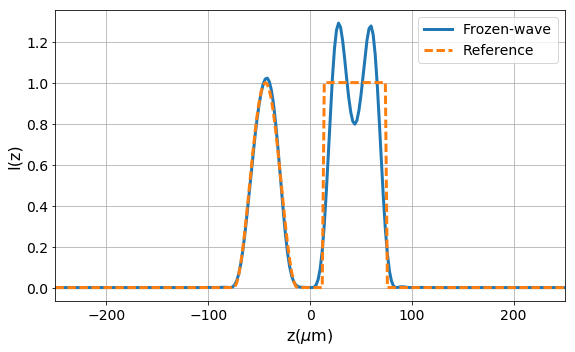

In [3]:
# LIPSIN Frozen Wave perfil plot
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

z = np.linspace(-L/2, L/2, 251)

plt.plot([z*1e6 for z in z], [vfw2.intensity(0, 0, z) for z in z], lw=3, label='Frozen-wave')
plt.plot([z*1e6 for z in z], [vfw2.reference_function(z)**2 for z in z], '--', lw=3, label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e6, L/2*1e6])
plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'z($\mu$m)', fontsize=16)
plt.ylabel('I(z)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-perfil-2D.png')
plt.show()

### 3D plot

In [5]:
rho_max = 20e-6
z_max = L/2

rho = np.linspace(-rho_max, rho_max, 251)
z = np.linspace(-z_max, z_max, 251)
RHO, Z = np.meshgrid(rho, z)

vinty = np.vectorize(lambda rho, z: vfw2.intensity(rho, 0, z, 'cylindrical'))

INTY = vinty(RHO, Z)

RHO = [rho*1e6 for rho in RHO]
Z = [z*1e6 for z in Z]

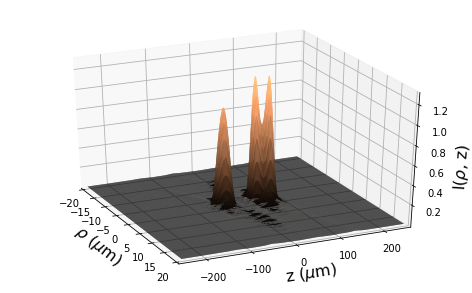

In [6]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

# https://matplotlib.org/examples/color/colormaps_reference.html
ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.copper)
#cset = ax.contourf(RHO, Z, INTY, zdir='z', offset=0, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='x', offset=-Rmax, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='y', offset=Zmax, cmap=cmplt.coolwarm)

ax.set_xlabel(r'$\rho$ ($\mu$m)', fontsize=16)
ax.set_xlim(-rho_max*1e6, rho_max*1e6)
ax.set_ylabel(r'z ($\mu$m)', fontsize=16)
ax.set_ylim(-z_max*1e6, z_max*1e6)
ax.set_zlabel(r'I($\rho$, z)', fontsize=16)

ax.view_init(elev=30, azim=-25)

plt.savefig('LIP-sin-const-perfil-3D.png')
plt.show()

### 4 kind longitudinal forces. nrel = 1.2

1/24
start: 24 Jul 2017 00:04:50
time: 13.109342098236084

2/24
start: 24 Jul 2017 00:05:03
time: 16.861990451812744

3/24
start: 24 Jul 2017 00:05:20
time: 19.42806100845337

4/24
start: 24 Jul 2017 00:05:40
time: 29.67432403564453

5/24
start: 24 Jul 2017 00:06:09
time: 36.383235692977905

6/24
start: 24 Jul 2017 00:06:46
time: 19.93795132637024

7/24
start: 24 Jul 2017 00:07:06
time: 34.96773624420166

8/24
start: 24 Jul 2017 00:07:41
time: 20.861026525497437

9/24
start: 24 Jul 2017 00:08:01
time: 21.29089045524597

10/24
start: 24 Jul 2017 00:08:23
time: 17.461316347122192

11/24
start: 24 Jul 2017 00:08:40
time: 18.317686557769775

12/24
start: 24 Jul 2017 00:08:59
time: 19.234020471572876

13/24
start: 24 Jul 2017 00:09:18
time: 39.25340747833252

14/24
start: 24 Jul 2017 00:09:57
time: 25.494650840759277

15/24
start: 24 Jul 2017 00:10:23
time: 24.42919659614563

16/24
start: 24 Jul 2017 00:10:47
time: 15.498023509979248

17/24
start: 24 Jul 2017 00:11:02
time: 20.7648439407348

time: 13.14875841140747

114/129
start: 24 Jul 2017 01:05:11
time: 13.439200401306152

115/129
start: 24 Jul 2017 01:05:24
time: 13.143008708953857

116/129
start: 24 Jul 2017 01:05:38
time: 4.770061254501343

117/129
start: 24 Jul 2017 01:05:42
time: 17.08040714263916

118/129
start: 24 Jul 2017 01:05:59
time: 12.980743408203125

119/129
start: 24 Jul 2017 01:06:12
time: 40.6839656829834

120/129
start: 24 Jul 2017 01:06:53
time: 12.885199069976807

121/129
start: 24 Jul 2017 01:07:06
time: 16.7402822971344

122/129
start: 24 Jul 2017 01:07:23
time: 12.718691349029541

123/129
start: 24 Jul 2017 01:07:35
time: 8.385790348052979

124/129
start: 24 Jul 2017 01:07:44
time: 12.59117865562439

125/129
start: 24 Jul 2017 01:07:56
time: 4.584286212921143

126/129
start: 24 Jul 2017 01:08:01
time: 12.73286247253418

127/129
start: 24 Jul 2017 01:08:14
time: 12.636875867843628

128/129
start: 24 Jul 2017 01:08:26
time: 12.631057977676392

129/129
start: 24 Jul 2017 01:08:39
time: 12.6987783908

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


time: 326.6604199409485

42/129
start: 24 Jul 2017 01:50:07
time: 43.0621440410614

43/129
start: 24 Jul 2017 01:50:50
time: 103.67209076881409

44/129
start: 24 Jul 2017 01:52:34
time: 422.77248978614807

45/129
start: 24 Jul 2017 01:59:37
time: 48.92181324958801

46/129
start: 24 Jul 2017 02:00:26
time: 40.65132188796997

47/129
start: 24 Jul 2017 02:01:06
time: 940.1280281543732

48/129
start: 24 Jul 2017 02:16:46
time: 673.2320756912231

49/129
start: 24 Jul 2017 02:28:00
time: 3611.33674120903

50/129
start: 24 Jul 2017 03:28:11
time: 76.70516324043274

51/129
start: 24 Jul 2017 03:29:28
time: 32.40066432952881

52/129
start: 24 Jul 2017 03:30:00
time: 39.51351618766785

53/129
start: 24 Jul 2017 03:30:39
time: 34.33119988441467

54/129
start: 24 Jul 2017 03:31:14
time: 51.52583408355713

55/129
start: 24 Jul 2017 03:32:05
time: 189.72231268882751

56/129
start: 24 Jul 2017 03:35:15
time: 276.5981729030609

57/129
start: 24 Jul 2017 03:39:52
time: 3473.895762205124

58/129
start: 

time: 27.1465585231781

49/129
start: 24 Jul 2017 11:11:24
time: 21.521816968917847

50/129
start: 24 Jul 2017 11:11:46
time: 24.203264474868774

51/129
start: 24 Jul 2017 11:12:10
time: 28.080852031707764

52/129
start: 24 Jul 2017 11:12:38
time: 23.776955127716064

53/129
start: 24 Jul 2017 11:13:02
time: 17.453043222427368

54/129
start: 24 Jul 2017 11:13:19
time: 23.206241130828857

55/129
start: 24 Jul 2017 11:13:42
time: 28.11914038658142

56/129
start: 24 Jul 2017 11:14:11
time: 19.0273756980896

57/129
start: 24 Jul 2017 11:14:30
time: 26.896281242370605

58/129
start: 24 Jul 2017 11:14:56
time: 4.306296348571777

59/129
start: 24 Jul 2017 11:15:01
time: 29.162030696868896

60/129
start: 24 Jul 2017 11:15:30
time: 119.29243516921997

61/129
start: 24 Jul 2017 11:17:29
time: 26.394622325897217

62/129
start: 24 Jul 2017 11:17:56
time: 28.752413511276245

63/129
start: 24 Jul 2017 11:18:24
time: 20.040344715118408

64/129
start: 24 Jul 2017 11:18:44
time: 27.399643421173096

65/1

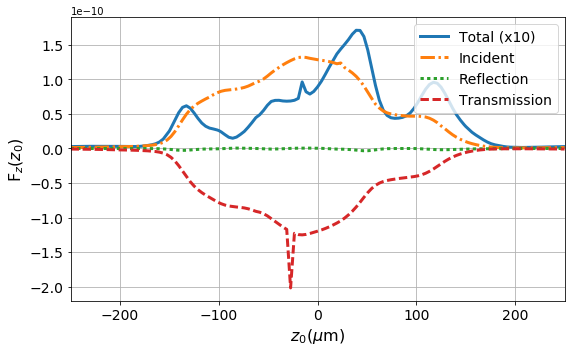

In [ ]:
ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -250e-6,
          'stop': 250e-6,
          'num': 80,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 1.2*1.33

X1, F1 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e6 for x in X1], [10*f for f in F1], lw=3, label='Total (x10)')

X1I, F1I = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e6 for x in X1I], [1*f for f in F1I], '-.', lw=3, label='Incident')

X1R, F1R = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e6 for x in X1R], [1*f for f in F1R], ':', lw=3, label='Reflection')

X1T, F1T = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e6 for x in X1T], [1*f for f in F1T], '--', lw=3, label='Transmission')

plt.xlim([paramx['start']*1e6, paramx['stop']*1e6])

plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$($\mu$m)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-4kind-forces-nrel=1o20.png')

plt.show()


### 4 kind longitudinal forces. nrel = 1.01

In [ ]:
ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -250e-6,
          'stop': 250e-6,
          'num': 80,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 1.01*1.33

X2, F2 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e6 for x in X2], [10*f for f in F2], lw=3, label='Total (x10)')

X2I, F2I = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e6 for x in X2I], [1*f for f in F2I], '-.', lw=3, label='Incident')

X2R, F2R = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e6 for x in X2R], [1*f for f in F2R], ':', lw=3, label='Reflection')

X2T, F2T = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e6 for x in X2T], [1*f for f in F2T], '--', lw=3, label='Transmission')

plt.xlim([paramx['start']*1e6, paramx['stop']*1e6])

plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$($\mu$m)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-4kind-forces-nrel=1o01.png')

plt.show()

1/24
start: 24 Jul 2017 14:04:42


/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


time: 1392.093947649002

2/24
start: 24 Jul 2017 14:27:54
time: 114.28363227844238

3/24
start: 24 Jul 2017 14:29:48
time: 25.943299055099487

4/24
start: 24 Jul 2017 14:30:14
time: 25.07185935974121

5/24
start: 24 Jul 2017 14:30:39
time: 25.919679403305054

6/24
start: 24 Jul 2017 14:31:05
time: 19.011872053146362

7/24
start: 24 Jul 2017 14:31:24
time: 22.513134717941284

8/24
start: 24 Jul 2017 14:31:47
time: 20.00245451927185

9/24
start: 24 Jul 2017 14:32:07
time: 15.387485265731812

10/24
start: 24 Jul 2017 14:32:22
time: 19.637064218521118

11/24
start: 24 Jul 2017 14:32:42
time: 19.31606698036194

12/24
start: 24 Jul 2017 14:33:01
time: 24.961892127990723

13/24
start: 24 Jul 2017 14:33:26
time: 20.607370138168335

14/24
start: 24 Jul 2017 14:33:47
time: 54.70677137374878

15/24
start: 24 Jul 2017 14:34:41
time: 61.04349899291992

16/24
start: 24 Jul 2017 14:35:42
time: 18.625003576278687

17/24
start: 24 Jul 2017 14:36:01
time: 23.181338787078857

18/24
start: 24 Jul 2017 14:

### 4 kind longitudinal forces. nrel = 0.95

In [ ]:
ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -250e-6,
          'stop': 250e-6,
          'num': 80,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 0.95*1.33

X3, F3 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e6 for x in X3], [10*f for f in F3], lw=3, label='Total (x10)')

X3I, F3I = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e6 for x in X3I], [1*f for f in F3I], '-.', lw=3, label='Incident')

X3R, F3R = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e6 for x in X3R], [1*f for f in F3R], ':', lw=3, label='Reflection')

X3T, F3T = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e6 for x in X3T], [1*f for f in F3T], '--', lw=3, label='Transmission')

plt.xlim([paramx['start']*1e6, paramx['stop']*1e6])

plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$($\mu$m)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-4kind-forces-nrel=0o95.png')

plt.show()


### Longitudinal force

1/1
start: 23 Jul 2017 21:47:28
time: 28.60741353034973

1/1
start: 23 Jul 2017 21:47:57
time: 18.95616364479065

1/2
start: 23 Jul 2017 21:48:16
time: 20.911426067352295

2/2
start: 23 Jul 2017 21:48:37


/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


time: 8172.560025215149



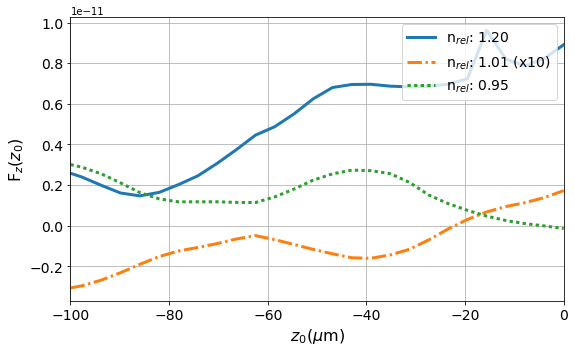

In [10]:
# LIPSIN Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -100e-6,
          'stop': 0e-6,
          'num': 20,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e6 for x in X1], [1*f for f in F1], lw=3, label=label)

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot([x*1e6 for x in X2], [10*f for f in F2], '-.', lw=3, label=label)

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e6 for x in X3], [1*f for f in F3], ':', lw=3, label=label)

plt.xlim([paramx['start']*1e6, paramx['stop']*1e6])

plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$($\mu$m)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-forces.png')

plt.show()

In [ ]:
# LIPSIN Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -150e-6,
          'stop': 150e-6,
          'num': 50,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([-x*1e6 for x in X1], [1*f for f in F1], 'g', lw=3, label=label)

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot([-x*1e6 for x in X2], [10*f for f in F2], 'r-.', lw=3, label=label)

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([-x*1e6 for x in X3], [1*f for f in F3], 'b:', lw=3, label=label)

plt.xlim([paramx['start']*1e6, paramx['stop']*1e6])

plt.legend(fontsize=14, loc=2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$($\mu$m)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-forces.png')

plt.show()